# Task 1 : Weather Data Analysis

# Import libraries:

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the weather data into a Pandas DataFrame


In [24]:
data = pd.read_csv(r"C:\Users\ABC\Desktop\All Taskss\Alfido\Task1\dataset\Weather Data.csv")

In [25]:
data

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


# Data Exploration

* All Columns 

In [26]:
data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

* Display the first few rows of the dataset


In [27]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


* Check for missing values


In [28]:
data.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

* Basic statistics


In [29]:
data.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


# Data Visualization

-> Visualize temperature trends, precipitation, and more using Matplotlib and Seaborn:


* Line plot of temperature over time

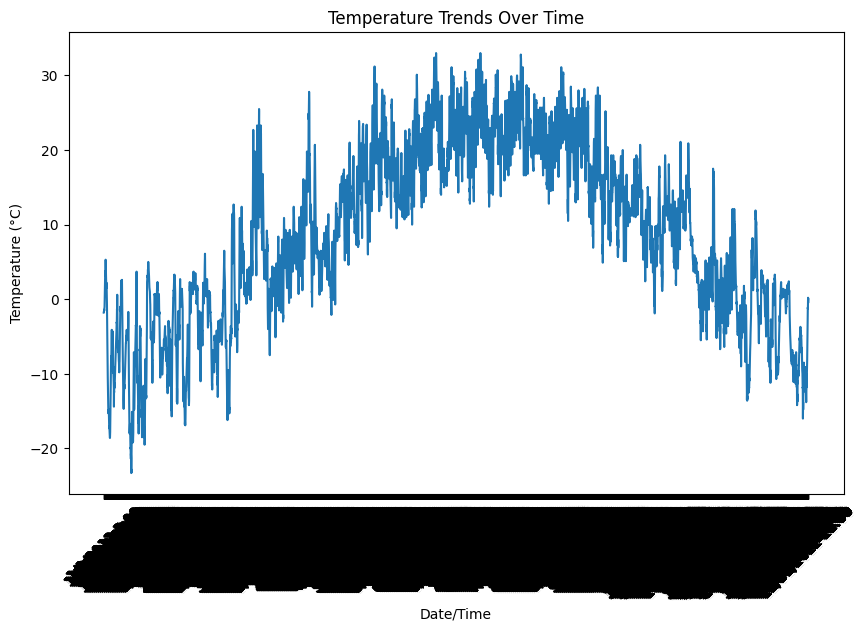

In [30]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date/Time', y='Temp_C', data=data)
plt.xlabel('Date/Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Trends Over Time')
plt.xticks(rotation=45)
plt.show()

* Histogram of relative humidity

Text(0.5, 1.0, 'Relative Humidity Distribution')

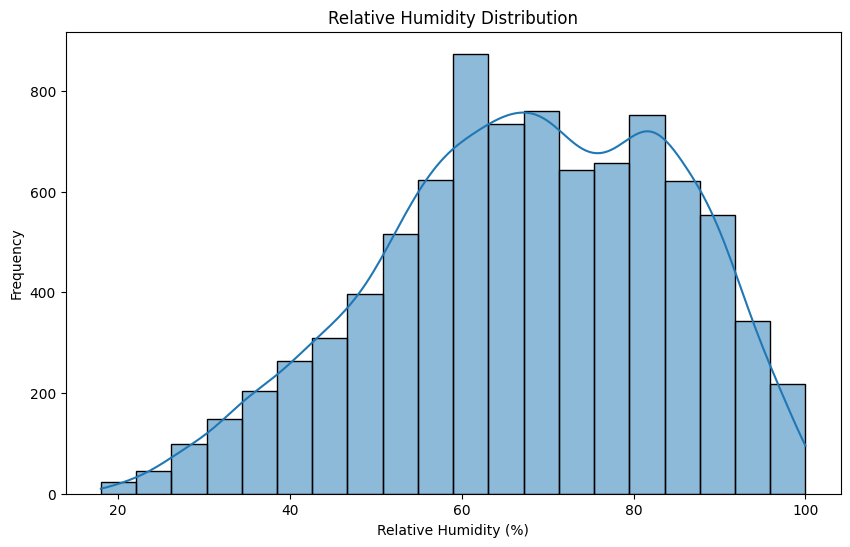

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Rel Hum_%'], bins=20, kde=True)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Frequency')
plt.title('Relative Humidity Distribution')

* Box plot of wind speed of the first 500

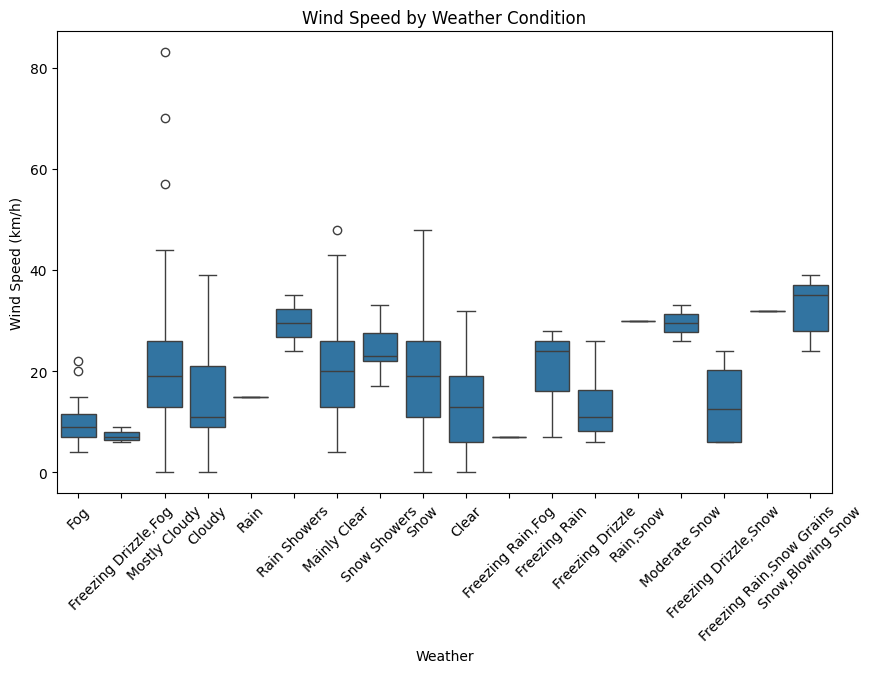

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weather', y='Wind Speed_km/h', data=data.head(500))
plt.xlabel('Weather')
plt.ylabel('Wind Speed (km/h)')
plt.title('Wind Speed by Weather Condition')
plt.xticks(rotation=45)
plt.show()

*  Countplot of weather conditions


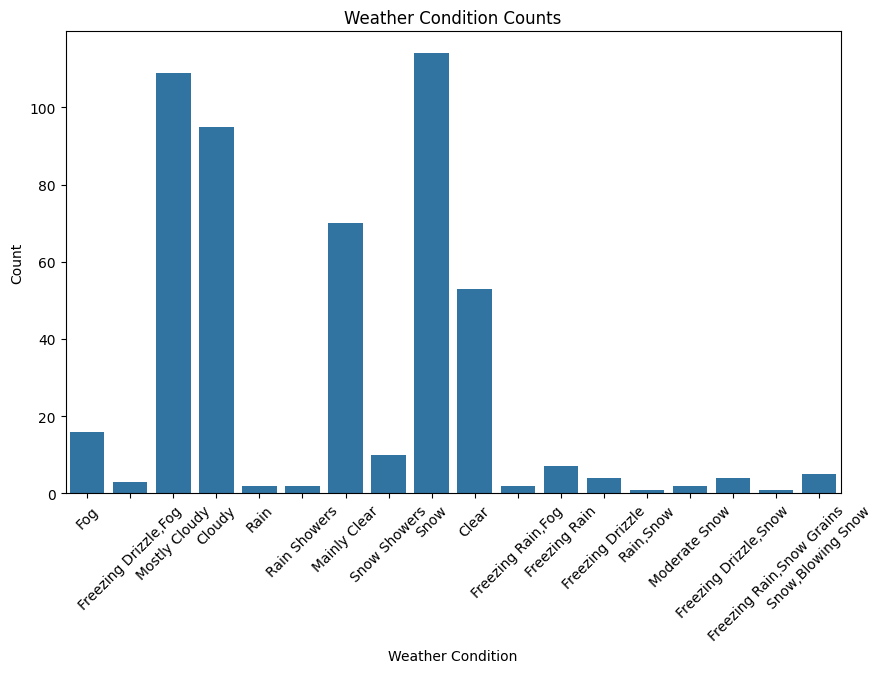

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather', data=data.head(500))
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.title('Weather Condition Counts')
plt.xticks(rotation=45)
plt.show()

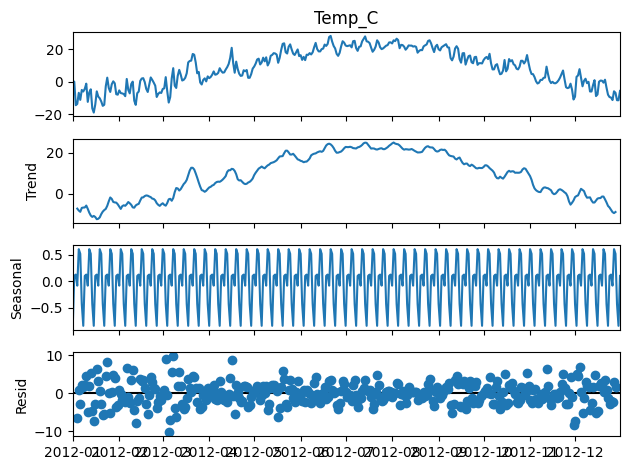

In [34]:
import statsmodels.api as sm

# Assuming 'Date/Time' is in a datetime format
data['Date/Time'] = pd.to_datetime(data['Date/Time'])
data.set_index('Date/Time', inplace=True)

# Resample the data to daily frequency and calculate the mean temperature
daily_mean_temp = data['Temp_C'].resample('D').mean()

# Create a time series decomposition plot
decomposition = sm.tsa.seasonal_decompose(daily_mean_temp, model='additive')
fig = decomposition.plot()
plt.show()
